#Predicting Income 

##Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 

Prediction task is to determine whether a person makes over 50K a year.

Source: https://archive.ics.uci.edu/ml/datasets/Census+Income

##List of Attributes:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

##Importing Data

In [1]:
import pandas as pd
import numpy as np
import pylab as plt

In [12]:
%matplotlib inline

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [138]:
train_data = pd.read_csv("adult.data.txt", header=None, index_col=False, engine = 'python', names=columns, sep=',\s', na_values=["?"])
#Some values were "?". The last two inputs sees to it that they are turned into NaN values for easier manipulation

In [139]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [79]:
test_data = pd.read_csv("adult.test.txt", header=None, index_col=False, engine='python', names=columns, sep=',\s', na_values=["?"])

In [43]:
test_data = test.ix[1:]

In [6]:
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


##Exploring Data

####Info on each column

In [9]:
print(train_data.describe())

                age          fnlwgt  education-num  capital-gain  \
count  32561.000000    32561.000000   32561.000000  32561.000000   
mean      38.581647   189778.366512      10.080679   1077.648844   
std       13.640433   105549.977697       2.572720   7385.292085   
min       17.000000    12285.000000       1.000000      0.000000   
25%       28.000000   117827.000000       9.000000      0.000000   
50%       37.000000   178356.000000      10.000000      0.000000   
75%       48.000000   237051.000000      12.000000      0.000000   
max       90.000000  1484705.000000      16.000000  99999.000000   

       capital-loss  hours-per-week         nulls  
count  32561.000000    32561.000000  32561.000000  
mean      87.303830       40.437456      0.130893  
std      402.960219       12.347429      0.479434  
min        0.000000        1.000000      0.000000  
25%        0.000000       40.000000      0.000000  
50%        0.000000       40.000000      0.000000  
75%        0.000000    

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 16 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
income            32561 non-null object
nulls             32561 non-null int64
dtypes: int64(7), object(9)
memory usage: 4.2+ MB


Note: The only columns with missing data are workclass, occupation, and native-country. Must decide if I want to replace the missing values, delete rows, or leave them be.

####Finding nulls per row

Find amount of nulls for each row. In this case I've decided to delete all null values; however, I could also choose to only delete cases with >1 nulls or >2 nulls, and fill in the missing values with the most common occurance.

In [142]:
train_nulls = train_data.isnull().sum(axis=1).tolist()
train_data['nulls'] = train_nulls
train_data = train_data[train_data['nulls']<1]

# train_data = train_data[train_data['workclass'] != np.nan]
# train_data = train_data[train_data['occupation'] != np.nan]
# train_data = train_data[train_data['native-country'] != np.nan]

# train_data = train_data[train_data[['workclass', 'occupation', 'native-country']] != np.nan]


####Age

In [145]:
# plt.hist(train['age'])
# plt.show()

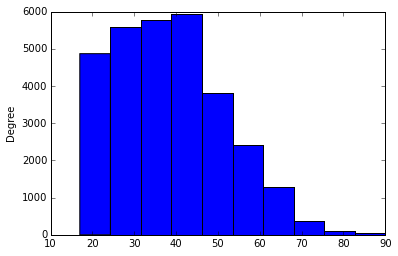

In [146]:
train_data['age'].plot(kind='hist')

####Workclass

In [147]:
workclasses = train_data['workclass'].unique().tolist()
for item in workclasses:
    print(item,":", len(train_data['workclass'][train_data['workclass'] == item]))

State-gov : 1279
Self-emp-not-inc : 2499
Private : 22286
Federal-gov : 943
Local-gov : 2067
Self-emp-inc : 1074
Without-pay : 14


In [148]:
for item in workclasses:
    train_data.loc[train_data["workclass"] == item, "workclass"] = workclasses.index(item)

/Users/molliepettit/anaconda/lib/python3.4/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


####fnlwgt

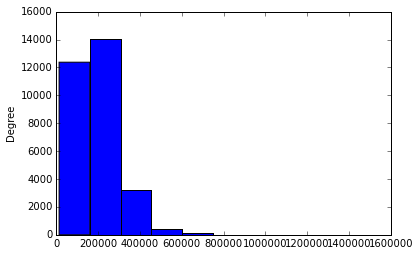

In [149]:
train_data['fnlwgt'].plot(kind='hist')

####Education

In [150]:
education = train_data['education'].unique().tolist()
for item in education:
    print(item,":", len(train_data['education'][train_data['education'] == item]))

Bachelors : 5044
HS-grad : 9840
11th : 1048
Masters : 1627
9th : 455
Some-college : 6678
Assoc-acdm : 1008
7th-8th : 557
Doctorate : 375
Assoc-voc : 1307
Prof-school : 542
5th-6th : 288
10th : 820
Preschool : 45
12th : 377
1st-4th : 151


In [151]:
for item in education:
    train_data.loc[train_data["education"] == item, "education"] = education.index(item)

/Users/molliepettit/anaconda/lib/python3.4/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


####Education Number

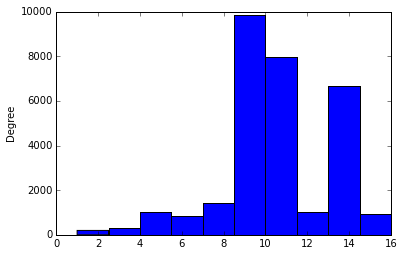

In [152]:
train_data['education-num'].plot(kind='hist')

####Marital Status

In [153]:
statuses = train_data['marital-status'].unique().tolist()
for item in statuses:
    print(item,":", len(train_data['marital-status'][train_data['marital-status'] == item]))

Never-married : 9726
Married-civ-spouse : 14065
Divorced : 4214
Married-spouse-absent : 370
Separated : 939
Married-AF-spouse : 21
Widowed : 827


In [154]:
for item in statuses:
    train_data.loc[train_data["marital-status"] == item, "marital-status"] = statuses.index(item)

/Users/molliepettit/anaconda/lib/python3.4/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


####Occupation

In [155]:
occupations = train_data['occupation'].unique().tolist()
for item in occupations:
    print(item,":", len(train_data['occupation'][train_data['occupation'] == item]))

Adm-clerical : 3721
Exec-managerial : 3992
Handlers-cleaners : 1350
Prof-specialty : 4038
Other-service : 3212
Sales : 3584
Transport-moving : 1572
Farming-fishing : 989
Machine-op-inspct : 1966
Tech-support : 912
Craft-repair : 4030
Protective-serv : 644
Armed-Forces : 9
Priv-house-serv : 143


In [156]:
for item in occupations:
    train_data.loc[train_data["occupation"] == item, "occupation"] = occupations.index(item)

/Users/molliepettit/anaconda/lib/python3.4/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


####Relationship

In [157]:
relationships = train_data['relationship'].unique().tolist()
for item in relationships:
    print(item,":", len(train_data['relationship'][train_data['relationship'] == item]))

Not-in-family : 7726
Husband : 12463
Wife : 1406
Own-child : 4466
Unmarried : 3212
Other-relative : 889


In [158]:
for item in relationships:
    train_data.loc[train_data["relationship"] == item, "relationship"] = relationships.index(item)

/Users/molliepettit/anaconda/lib/python3.4/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


####Race

In [159]:
races = train_data['race'].unique().tolist()
for item in races:
    print(item,":", len(train_data['race'][train_data['race'] == item]))

White : 25933
Black : 2817
Asian-Pac-Islander : 895
Amer-Indian-Eskimo : 286
Other : 231


In [160]:
for item in races:
    train_data.loc[train_data["race"] == item, "race"] = races.index(item)

/Users/molliepettit/anaconda/lib/python3.4/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


####Sex

In [161]:
sexes = train_data['sex'].unique().tolist()
for item in sexes:
    print(item,":", len(train_data['sex'][train_data['sex'] == item]))

Male : 20380
Female : 9782


In [162]:
# train_data.loc[train_data["sex"] == "Male", "sex"] = 0
# train_data.loc[train_data['sex'] == 'Female', 'sex'] = 1
# train_data['sex'][train_data["sex"] == "Male"] = 0
# train_data['sex'][train_data["sex"] == "Female"] = 1
for item in sexes:
    train_data.loc[train_data["sex"] == item, "sex"] = sexes.index(item)


/Users/molliepettit/anaconda/lib/python3.4/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


####Capital Gain

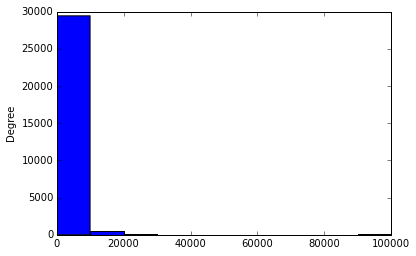

In [163]:
train_data['capital-gain'].plot(kind='hist')

In [164]:
capital_gain_not_zero = train_data['capital-gain'][train_data['capital-gain']!=0]

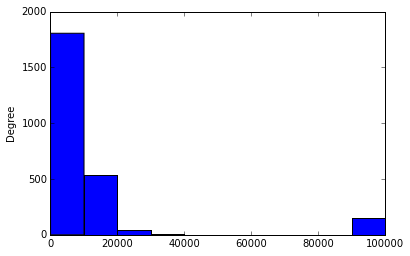

In [165]:
capital_gain_not_zero.plot(kind='hist')

####Capital Loss

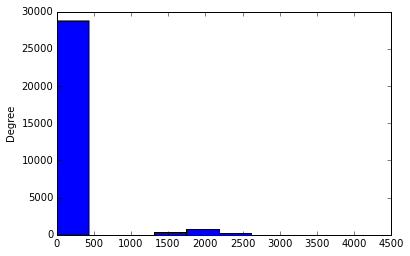

In [166]:
train_data['capital-loss'].plot(kind='hist')

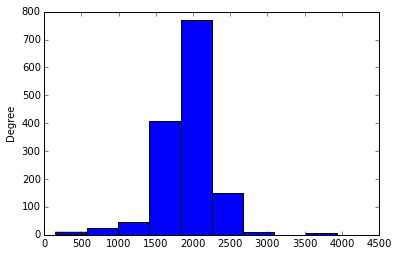

In [167]:
capital_loss_not_zero = train_data['capital-loss'][train_data['capital-loss']!=0]
capital_loss_not_zero.plot(kind='hist')

####Hours Per Week

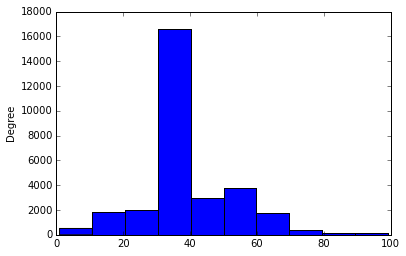

In [168]:
train_data['hours-per-week'].plot(kind='hist')

####Native Countries

In [169]:
countries = train_data['native-country'].unique().tolist()
for item in countries:
    print(item,":", len(train_data['native-country'][train_data['native-country'] == item]))

United-States : 27504
Cuba : 92
Jamaica : 80
India : 100
Mexico : 610
Puerto-Rico : 109
Honduras : 12
England : 86
Canada : 107
Germany : 128
Iran : 42
Philippines : 188
Poland : 56
Columbia : 56
Cambodia : 18
Thailand : 17
Ecuador : 27
Laos : 17
Taiwan : 42
Haiti : 42
Portugal : 34
Dominican-Republic : 67
El-Salvador : 100
France : 27
Guatemala : 63
Italy : 68
China : 68
South : 71
Japan : 59
Yugoslavia : 16
Peru : 30
Outlying-US(Guam-USVI-etc) : 14
Scotland : 11
Trinadad&Tobago : 18
Greece : 29
Nicaragua : 33
Vietnam : 64
Hong : 19
Ireland : 24
Hungary : 13
Holand-Netherlands : 1


In [170]:
for item in countries:
    train_data.loc[train_data["native-country"] == item, "native-country"] = countries.index(item)

/Users/molliepettit/anaconda/lib/python3.4/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


####Income

In [173]:
incomes = train_data['income'].unique().tolist()
for item in incomes:
    print(item,":", len(train_data['income'][train_data['income'] == item]))

<=50K : 22654
>50K : 7508


In [174]:
for item in incomes:
    train_data.loc[train_data["income"] == item, "income"] = incomes.index(item)

/Users/molliepettit/anaconda/lib/python3.4/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [175]:
train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,nulls
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0,0
5,37,2,284582,3,14,1,1,2,0,1,0,0,40,0,0,0
6,49,2,160187,4,5,3,4,0,1,1,0,0,16,2,0,0
7,52,1,209642,1,9,1,1,1,0,0,0,0,45,0,1,0
8,31,2,45781,3,14,0,3,0,0,1,14084,0,50,0,1,0
9,42,2,159449,0,13,1,1,1,0,0,5178,0,40,0,1,0


##Linear Regression

In [177]:
# Import the linear regression class
from sklearn.linear_model import LinearRegression
# Sklearn also has a helper that makes it easy to do cross validation
from sklearn.cross_validation import KFold

# The columns we'll use to predict the target
predictors = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

# Initialize our algorithm class
alg = LinearRegression()
# Generate cross validation folds for the titanic dataset.  It return the row indices corresponding to train and test.
# We set random_state to ensure we get the same splits every time we run this.
kf = KFold(train_data.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
    train_predictors = (train_data[predictors].iloc[train,:])
    # The target we're using to train the algorithm.
    train_target = train_data["income"].iloc[train]
    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = alg.predict(train_data[predictors].iloc[test,:])
    predictions.append(test_predictions)

In [178]:
predictions

[array([ 0.4128897 ,  0.35737471,  0.22523031, ...,  0.65859808,
         0.13096078,  0.15683757]),
 array([ 0.80920257,  0.15635999,  0.34309362, ...,  0.08011861,
         0.18258992,  0.26395566]),
 array([ 0.34386432,  0.13647475,  0.06617063, ...,  0.14665323,
         0.05880641,  0.38225167])]

The predictions are in three separate numpy arrays.  Concatenate them into one.  We concatenate them on axis 0, as they only have one axis.

In [180]:
predictions = np.concatenate(predictions, axis=0)

In [182]:
predictions

array([ 0.4128897 ,  0.35737471,  0.22523031, ...,  0.14665323,
        0.05880641,  0.38225167])

round the predictions so they are only 0 or 1, nothing in between

In [185]:
predications = [int(round(n, 0)) for n in predictions]

Accuracy:

In [186]:
accuracy = sum(predictions[predictions == train_data["income"]]) / len(predictions)
accuracy

/Users/molliepettit/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


0.41288970329277003